In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [73]:
kickstarter = pd.read_csv('kickstarter_magic_tr.csv')


In [74]:
kickstarter.head()

,Unnamed: 0,category,url,subcategory,project_name,creator,location,goal,pledged,backers,funding_start_date,funding_end_date,funding_pc,funding_duration,location_state,location_city
0,0,Theater,https://www.kickstarter.com/projects/139200220...,Theater,The Intergalactic Travel Bureau Tour,Olivia Koski,"New York, NY",15000.0,30777.0,1098,2014-02-28,2014-03-30,2.051800,30 days 00:00:00.000000000,NY,New York
1,1,Theater,https://www.kickstarter.com/projects/sweetandl...,Immersive,Sweet & Lucky,Off-Center,"Denver, CO",16000.0,40284.0,364,2016-03-15,2016-04-12,2.517750,28 days 00:00:00.000000000,CO,Denver
2,2,Theater,https://www.kickstarter.com/projects/153605820...,Immersive,Houseworld,Andrew Hoepfner,"New York, NY",30000.0,35062.0,229,2015-05-20,2015-06-19,1.168733,30 days 00:00:00.000000000,NY,New York
3,3,Theater,https://www.kickstarter.com/projects/manualcin...,Experimental,Mementos Mori,Manual Cinema,"Chicago, IL",10000.0,12602.0,175,2014-07-21,2014-08-20,1.260200,30 days 00:00:00.000000000,IL,Chicago
4,4,Theater,https://www.kickstarter.com/projects/169410663...,Theater,ImageS Magazine #13 - The Golden Glory of the ...,Jim Vadeboncoeur Jr,"Palo Alto, CA",8800.0,17440.0,249,2014-04-29,2014-05-29,1.981818,30 days 00:00:00.000000000,CA,Palo Alto


In [97]:
# check datatype of the columns all at once
kickstarter.dtypes

Unnamed: 0              int64
category               object
url                    object
subcategory            object
project_name           object
creator                object
location               object
goal                  float64
pledged               float64
backers                 int64
funding_start_date     object
funding_end_date       object
funding_pc            float64
funding_duration        int64
location_state         object
location_city          object
dtype: object

In [76]:
kickstarter['funding_duration'].replace('days 00:00:00.000000000', '', regex = True, inplace = True)

In [77]:
kickstarter['funding_duration'] = kickstarter['funding_duration'].astype(int)

In [ ]:
# to fix UnicodeDecodeError
#kickstarter['project_name'] = kickstarter['project_name'].str.decode('cp1252').str.encode('utf-8') 

In [14]:
# from bokeh.charts import Scatter, output_file, show

# p1 = Scatter(kickstarter, x = 'category', y = 'funding_pc',
#              color = 'category',
#              title = 'Funding percentage of different categories of project',
#              xlabel = 'Category', ylabel = 'Funding percentage')

# #output_file("Fundpc_cat.html")

# show(p1)


In [63]:
from bokeh.charts import Scatter, show
from bokeh.io import output_notebook
p2 = Scatter(kickstarter, x = 'funding_duration', y = 'funding_pc',
           title = 'Campaign Duration vs Funding Percentage',
           xlabel = 'Campaign Duration (days)', ylabel = 'Funding Percentage')

#output_file("goalVSpledged.html")
#output_notebook()
show(p2)

In [79]:
kickstarter.head()

,Unnamed: 0,category,url,subcategory,project_name,creator,location,goal,pledged,backers,funding_start_date,funding_end_date,funding_pc,funding_duration,location_state,location_city
0,0,Theater,https://www.kickstarter.com/projects/139200220...,Theater,The Intergalactic Travel Bureau Tour,Olivia Koski,"New York, NY",15000.0,30777.0,1098,2014-02-28,2014-03-30,2.051800,30,NY,New York
1,1,Theater,https://www.kickstarter.com/projects/sweetandl...,Immersive,Sweet & Lucky,Off-Center,"Denver, CO",16000.0,40284.0,364,2016-03-15,2016-04-12,2.517750,28,CO,Denver
2,2,Theater,https://www.kickstarter.com/projects/153605820...,Immersive,Houseworld,Andrew Hoepfner,"New York, NY",30000.0,35062.0,229,2015-05-20,2015-06-19,1.168733,30,NY,New York
3,3,Theater,https://www.kickstarter.com/projects/manualcin...,Experimental,Mementos Mori,Manual Cinema,"Chicago, IL",10000.0,12602.0,175,2014-07-21,2014-08-20,1.260200,30,IL,Chicago
4,4,Theater,https://www.kickstarter.com/projects/169410663...,Theater,ImageS Magazine #13 - The Golden Glory of the ...,Jim Vadeboncoeur Jr,"Palo Alto, CA",8800.0,17440.0,249,2014-04-29,2014-05-29,1.981818,30,CA,Palo Alto


In [10]:
kickstarter = kickstarter.sort_values(by = 'category', ascending = True)

In [89]:
avgfund_by_category = kickstarter.groupby('category', as_index = False)['funding_pc'].mean()
avgfund_by_category = avgfund_by_category.sort_values(by = 'funding_pc', ascending = True)
avgfund_by_category


,category,funding_pc
3,Dance,1.153109
14,Theater,1.273923
6,Film & Video,1.325305
9,Journalism,1.431312
11,Photography,1.810409
10,Music,1.902869
12,Publishing,1.986363
1,Comics,3.178156
5,Fashion,3.262963
7,Food,3.398397


In [24]:
from bokeh.charts import Bar, show
from bokeh.io import output_notebook, save

output_notebook()


Loading BokehJS ...

In [234]:
# Average funding percentage for each category

from bokeh.models import NumeralTickFormatter

p4 = Bar(data = kickstarter, label = 'category', values = 'funding_pc', color = 'category', agg = 'mean',
        title = 'Which category has the highest average funding percentage?')
p4.yaxis.axis_label = 'Funding Percentage' 
p4.legend.label_text_font_size = "8pt"
p4.yaxis[0].formatter = NumeralTickFormatter(format="0.%")


show(p4)

In [236]:
# Average number of backers for each category

#from bokeh.models import NumeralTickFormatter

p5 = Bar(data = kickstarter, label = 'category', color = 'category', values = 'backers', agg = 'mean',
        title = 'Which category has the highest average number of backers?')
p5.yaxis.axis_label = 'Average number of backers' 
p5.legend.label_text_font_size = "8pt"
#p5.yaxis[0].formatter = NumeralTickFormatter(format="0.%")

show(p5)


In [209]:
# For each category, majority of projects are in which sub-category?

art = kickstarter.loc[kickstarter['category'] == 'Art']
comics = kickstarter.loc[kickstarter['category'] == 'Comics']
crafts = kickstarter.loc[kickstarter['category'] == 'Crafts']
dance = kickstarter.loc[kickstarter['category'] == 'Dance']
design = kickstarter.loc[kickstarter['category'] == 'Design']
fashion = kickstarter.loc[kickstarter['category'] == 'Fashion']
filmvideo = kickstarter.loc[kickstarter['category'] == 'Film & Video']
food = kickstarter.loc[kickstarter['category'] == 'Food']
games = kickstarter.loc[kickstarter['category'] == 'Games']
journalism = kickstarter.loc[kickstarter['category'] == 'Journalism']
music = kickstarter.loc[kickstarter['category'] == 'Music']
photography = kickstarter.loc[kickstarter['category'] == 'Photography']
publishing = kickstarter.loc[kickstarter['category'] == 'Publishing']
technology = kickstarter.loc[kickstarter['category'] == 'Technology']
theater = kickstarter.loc[kickstarter['category'] == 'Theater']


In [233]:
# For each category, majority of projects are in which sub-category?

from bokeh.io import gridplot

s1 = Bar(data = art, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
        title = 'ART', plot_width=300, plot_height=300)
s1.yaxis.axis_label = 'Total number of projects'

s2= Bar(data = comics, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
       title = 'COMICS', plot_width=300, plot_height =300)
s2.yaxis.axis_label = 'Total number of projects'

s3 = Bar(data = crafts, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
        title = 'CRAFTS', plot_width=300, plot_height =300)
s3.yaxis.axis_label = 'Total number of projects'

s4 = Bar(data = dance, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
        title = 'DANCE', plot_width=300, plot_height =300)
s4.yaxis.axis_label = 'Total number of projects'

s5 = Bar(data = design, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
        title = 'DESIGN', plot_width=300, plot_height =300)
s5.yaxis.axis_label = 'Total number of projects'

s6 = Bar(data = fashion, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
        title = 'FASHION', plot_width=300, plot_height =300)
s6.yaxis.axis_label = 'Total number of projects'

s7 = Bar(data = filmvideo, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
        title = 'FILM & VIDEO', plot_width=300, plot_height =300)
s7.yaxis.axis_label = 'Total number of projects'

s8 = Bar(data = food, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
        title = 'FOOD', plot_width=300, plot_height =300)
s8.yaxis.axis_label = 'Total number of projects'

s9 = Bar(data = games, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
        title = 'GAMES', plot_width=300, plot_height =300)
s9.yaxis.axis_label = 'Total number of projects'

s10 = Bar(data = journalism, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
         title = 'JOURNALISM', plot_width=300, plot_height =300)
s3.yaxis.axis_label = 'Total number of projects'

s11 = Bar(data = music, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
         title = 'MUSIC', plot_width=300, plot_height =300)
s11.yaxis.axis_label = 'Total number of projects'

s12 = Bar(data = photography, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
         title = 'PHOTOGRAPHY', plot_width=300, plot_height =300)
s12.yaxis.axis_label = 'Total number of projects'

s13 = Bar(data = publishing, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
         title = 'PUBLISHING', plot_width=300, plot_height =300)
s13.yaxis.axis_label = 'Total number of projects'

s14 = Bar(data = technology, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
         title = 'TECHNOLOGY', plot_width=300, plot_height =300)
s14.yaxis.axis_label = 'Total number of projects'

s15 = Bar(data = theater, label = 'subcategory', color = 'subcategory', agg = 'sum', legend = None,
         title = 'THEATER', plot_width=300, plot_height =300)
s15.yaxis.axis_label = 'Total number of projects'

# put all the plots in a grid layout
gp = gridplot([s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15], ncols = 3)

show(gp)


In [146]:
kickstarter = kickstarter.drop('Unnamed: 0', 1) # deleting the first column; 0 for row and 1 for col in drop()

In [147]:
kickstarter.head()

,category,url,subcategory,project_name,creator,location,goal,pledged,backers,funding_start_date,funding_end_date,funding_pc,funding_duration,location_state,location_city
0,Theater,https://www.kickstarter.com/projects/139200220...,Theater,The Intergalactic Travel Bureau Tour,Olivia Koski,"New York, NY",15000.0,30777.0,1098,2014-02-28,2014-03-30,2.051800,30,NY,New York
1,Theater,https://www.kickstarter.com/projects/sweetandl...,Immersive,Sweet & Lucky,Off-Center,"Denver, CO",16000.0,40284.0,364,2016-03-15,2016-04-12,2.517750,28,CO,Denver
2,Theater,https://www.kickstarter.com/projects/153605820...,Immersive,Houseworld,Andrew Hoepfner,"New York, NY",30000.0,35062.0,229,2015-05-20,2015-06-19,1.168733,30,NY,New York
3,Theater,https://www.kickstarter.com/projects/manualcin...,Experimental,Mementos Mori,Manual Cinema,"Chicago, IL",10000.0,12602.0,175,2014-07-21,2014-08-20,1.260200,30,IL,Chicago
4,Theater,https://www.kickstarter.com/projects/169410663...,Theater,ImageS Magazine #13 - The Golden Glory of the ...,Jim Vadeboncoeur Jr,"Palo Alto, CA",8800.0,17440.0,249,2014-04-29,2014-05-29,1.981818,30,CA,Palo Alto


In [149]:
kickCorr = kickstarter.corr()

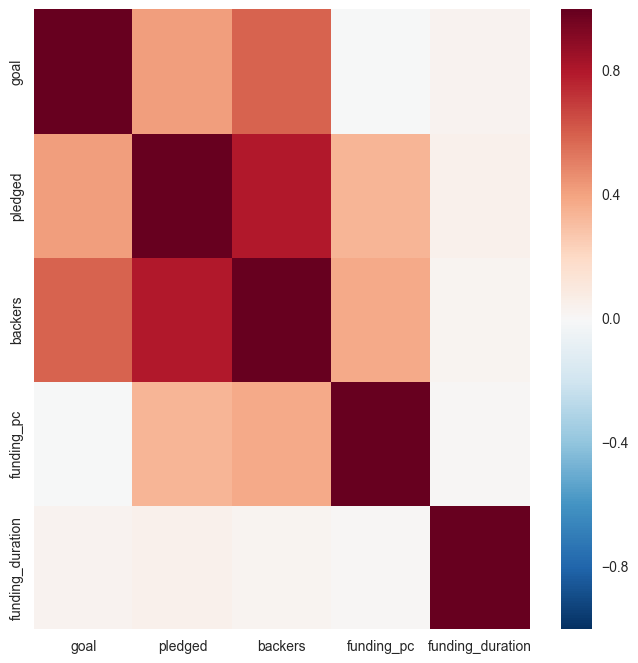

In [164]:
# Heat Map
plt.subplots(figsize=(8,8))
sns.heatmap(kickCorr)


In [270]:
kickstarter.groupby(['category', 'location_state'])['location_state'].count().head()

category  location_state
Art       AL                 1
          CA                22
          FL                 1
          IL                 3
          LA                 2
Name: location_state, dtype: int64